In [74]:
import numpy as np
from numpy import linalg as LA
import argparse
import os
from  scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
def rotate(accelerationVector, quaternion):
    r = R.from_quat(quaternion)
    rotatedA = r.apply(accelerationVector)
    euler_angles = r.as_euler('xyz', degrees = True)
    return rotatedA, euler_angles

In [3]:
#parser = argparse.ArgumentParser()
#parser.add_argument('--filepath', '-f', type=str, help='The filepath of the desired ####_flightlog.bin', required=True)
#parser.add_argument('--numpy', '-n', action='store_true', dest='numpy_output')
#args = parser.parse_args()

In [76]:
filepath = 'packet_data.npy'

In [77]:
data = np.load(filepath)
rot_data = []
rot_angles = []
l2_norm_Acc = []
gravity = [0, 0, 9.8]

In [78]:

for i in range(len(data)):
   quaternion = data[i, 24:28]
   rotatedData = rotate(gravity, quaternion)
   rot_data.append(rotatedData[0])
   rot_angles.append(rotatedData[1])
   l2_norm_Acc.append(LA.norm(data[i,12:15]))
   


In [79]:
print(rot_data[0])
print(rot_angles[0])
print(data[1,12:15])
print(rot_data[1])
print(rot_data[2])
print(rot_data[3])



[-3.97569166e-02  7.61112150e-03 -9.79991640e+00]
[-179.95428543    0.23220374    0.29991408]
[ 5.9761405   7.89396429 -0.56744611]
[-0.08003768  0.01528118 -9.79966124]
[-0.08003768  0.01528118 -9.79966124]
[-0.08003768  0.01528118 -9.79966124]


Text(0.5, 1.0, 'Thrust Curve for METRA (04-07)')

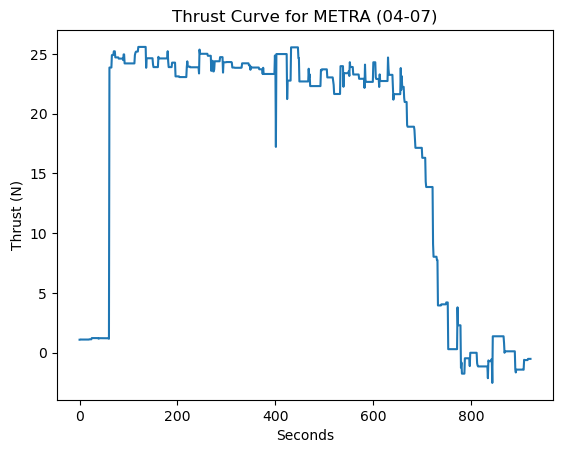

In [80]:
t_start, t_end = int(data.shape[0]*0.5879), int(data.shape[0]*0.5888)
plt.plot(data[t_start:t_end,14])
plt.xlabel('Seconds')
plt.ylabel('Thrust (N)')
plt.title('Thrust Curve for METRA (04-07)')



Text(0.5, 1.0, 'X angles')

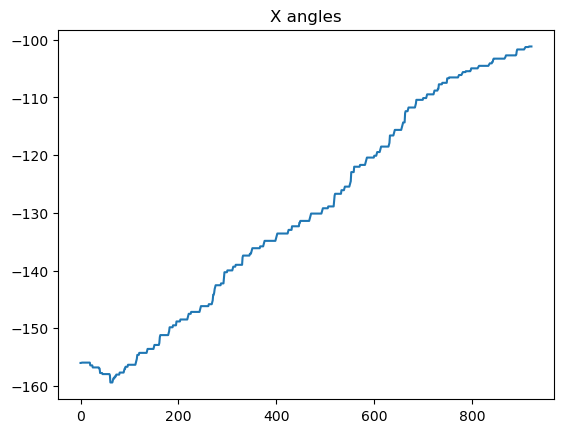

In [82]:
rot_angles = np.array(rot_angles)
rot_angles.shape
plt.plot(rot_angles[t_start:t_end,0])
plt.title('X angles')



Text(0.5, 0, 'Time')

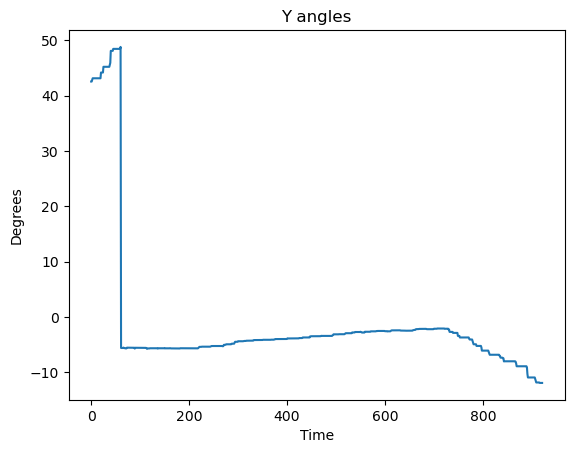

In [93]:
plt.plot(rot_angles[t_start:t_end,1])
plt.title('Y angles')
plt.ylabel("Degrees")
plt.xlabel("Time")


Text(0.5, 0, 'Time')

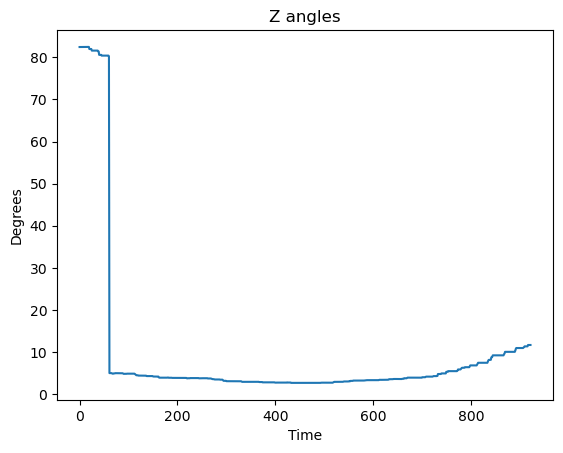

In [92]:
plt.plot(rot_angles[t_start:t_end,2])
plt.title('Z angles')
plt.ylabel("Degrees")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

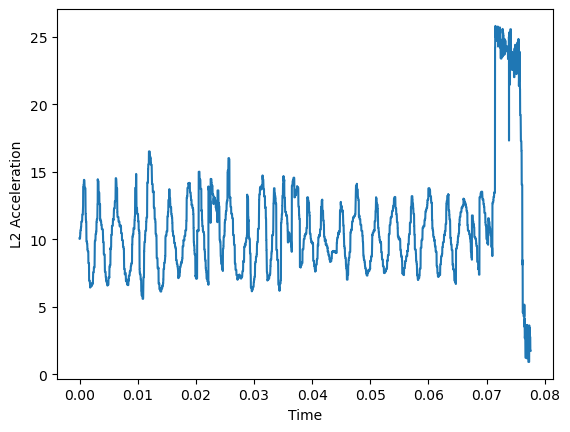

In [105]:
l2_norm_Acc = np.array(l2_norm_Acc)
plt.plot(np.arange(0,10922)*71*1e-7,l2_norm_Acc[t_start-10000:t_end])


plt.ylabel('L2 Acceleration')
plt.xlabel("Time")


In [101]:
np.arange(0,10922)

array([    0,     1,     2, ..., 10919, 10920, 10921])